In [1]:
import sympy as sym

h = sym.Symbol("h")
a0 = sym.Symbol("a0")
a1 = sym.Symbol("a1")
a2 = sym.Symbol("a2")
a3 = sym.Symbol("a3")

sym.solve(
    [
        a0 + a1 + a2 + a3,
        -a0 * h + h * a2 + 2 * h * a3 + 1,
        h**2 / 2 * a0 + h**2 / 2 * a2 + 2 * h * a3,
        -(h**3) / 6 * a0 + h**3 / 6 * a2 + 4 / 3 * h**3 * a3,
    ],
    [a0, a1, a2, a3],
)

{a0: 0.333333333333333*(2.0*h - 1.0)/h**2,
 a1: 0.166666666666667*(4.0 - h)/h**2,
 a2: 0.333333333333333*(-2.0*h - 1.0)/h**2,
 a3: 0.166666666666667/h}

In [2]:
import numpy as np


def pade(x, f):
    n = f.shape[0]
    h = x[1] - x[0]
    a1 = np.ones(n - 1)
    a1[-1] = 2
    a1 = np.diag(a1, k=-1)
    a2 = 4 * np.ones(n)
    a2[0] = 1
    a2[-1] = 1
    a2 = np.diag(a2)
    a3 = np.ones(n - 1)
    a3[0] = 2
    a3 = np.diag(a3, k=1)
    A = a1 + a2 + a3

    b = np.zeros(n)

    for i, bi in enumerate(b):
        if i == 0:
            b[i] = -2.5 * f[i] + 2 * f[i + 1] + 0.5 * f[i + 2]

        elif i == n - 1:
            b[i] = 2.5 * f[i] - 2 * f[i - 1] - 0.5 * f[i - 2]

        else:
            b[i] = 3 * (f[i + 1] - f[i - 1])
    b /= h

    return np.linalg.solve(A, b)


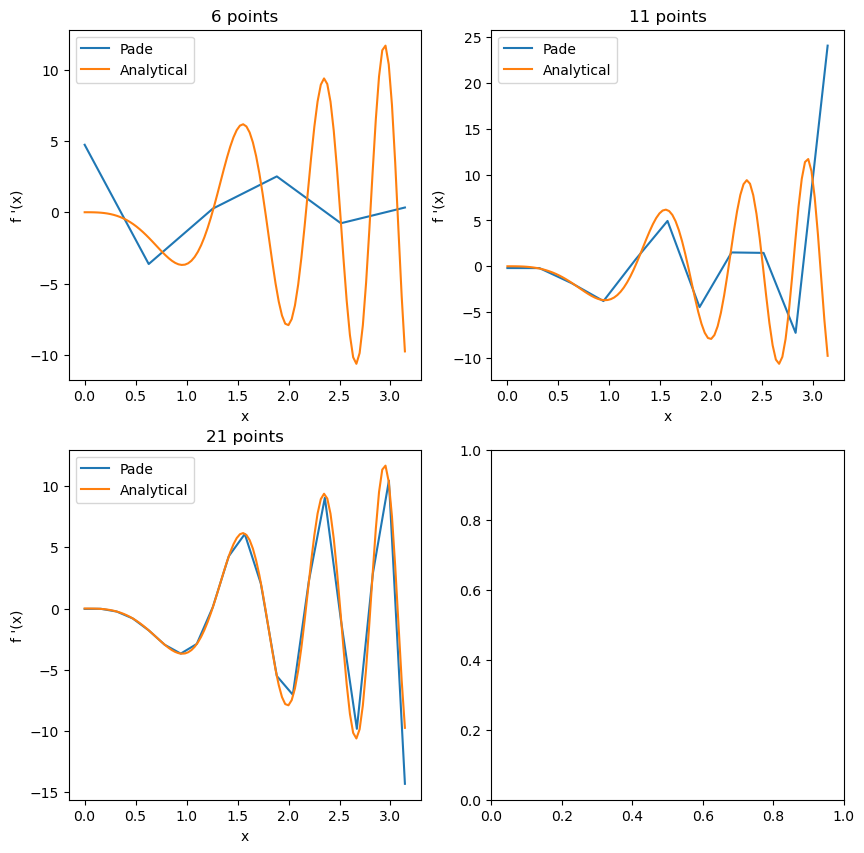

In [3]:
import matplotlib.pyplot as plt


def f(x):
    return np.cos(2 * x**2)


def fp(x):
    return -4 * x * np.sin(2 * x**2)


x0 = np.linspace(0, np.pi, 100)
fp0 = fp(x0)

x1 = np.linspace(0, np.pi, 6)
x2 = np.linspace(0, np.pi, 11)
x3 = np.linspace(0, np.pi, 21)

f1 = f(x1)
fp1 = pade(x1, f1)

f2 = f(x2)
fp2 = pade(x2, f2)

f3 = f(x3)
fp3 = pade(x3, f3)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].plot(x1, fp1, label="Pade")
ax[0, 0].plot(x0, fp0, label="Analytical")
ax[0, 0].set_title("6 points")
ax[0, 0].legend()
ax[0, 0].set_ylabel("f '(x)")
ax[0, 0].set_xlabel("x")

ax[0, 1].plot(x2, fp2, label="Pade")
ax[0, 1].plot(x0, fp0, label="Analytical")
ax[0, 1].set_title("11 points")
ax[0, 1].legend()
ax[0, 1].set_ylabel("f '(x)")
ax[0, 1].set_xlabel("x")

ax[1, 0].plot(x3, fp3, label="Pade")
ax[1, 0].plot(x0, fp0, label="Analytical")
ax[1, 0].set_title("21 points")
ax[1, 0].legend()
ax[1, 0].set_ylabel("f '(x)")
ax[1, 0].set_xlabel("x")

plt.show()

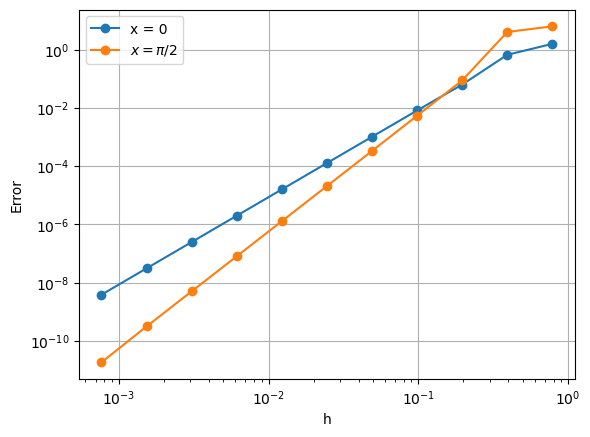

The log-error slope at x = 0: 2.947
The log-error slope at x = pi/2: 3.981


In [27]:
n = np.arange(2.0, 13.0, 1)
h = np.pi / 2 ** (n)
err0 = np.zeros(n.shape[0])
err_pi_2 = np.zeros(n.shape[0])

for i, hi in enumerate(h):
    grid = np.linspace(0, np.pi, int(np.pi / hi) + 1)
    fpade = pade(grid, f(grid))
    fp0 = fp(grid)

    err0[i] = np.abs(fpade[0] - fp0[0])
    ni = fpade.shape[0]
    err_pi_2[i] = np.abs(fpade[ni // 2] - fp0[ni // 2])

plt.loglog(h, err0, label="x = 0", marker="o")
plt.loglog(h, err_pi_2, label=r"$x = \pi/2$", marker="o")
plt.xlabel("h")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

m0, b0 = np.polyfit(np.log(h), np.log(err0), 1)
m_pi_2, b_pi_2 = np.polyfit(np.log(h), np.log(err_pi_2), 1)

print(f"The log-error slope at x = 0: {np.round(m0, 3)}")
print(f"The log-error slope at x = pi/2: {np.round(m_pi_2, 3)}")


In [17]:
print(len(grid))
print(grid)
print(h)

5
[0.         0.78539816 1.57079633 2.35619449 3.14159265]
[7.85398163e-01 3.92699082e-01 1.96349541e-01 9.81747704e-02
 4.90873852e-02 2.45436926e-02 1.22718463e-02 6.13592315e-03
 3.06796158e-03 1.53398079e-03 7.66990394e-04]


In [24]:
np.pi / 2


1.5707963267948966

In [21]:
print(h)


[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04]


In [20]:
print(np.pi / h)

[3.14159265e+00 6.28318531e+00 1.25663706e+01 2.51327412e+01
 5.02654825e+01 1.00530965e+02 2.01061930e+02 4.02123860e+02
 8.04247719e+02 1.60849544e+03 3.21699088e+03 6.43398175e+03
 1.28679635e+04]
